In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv(r'C:\Users\Shraddha\Downloads\Zeotap Assignment\Customers.csv')
products = pd.read_csv(r'C:\Users\Shraddha\Downloads\Zeotap Assignment\Products.csv')
transactions = pd.read_csv(r'C:\Users\Shraddha\Downloads\Zeotap Assignment\Transactions.csv')

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
customers.info()
products.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


In [7]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [8]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


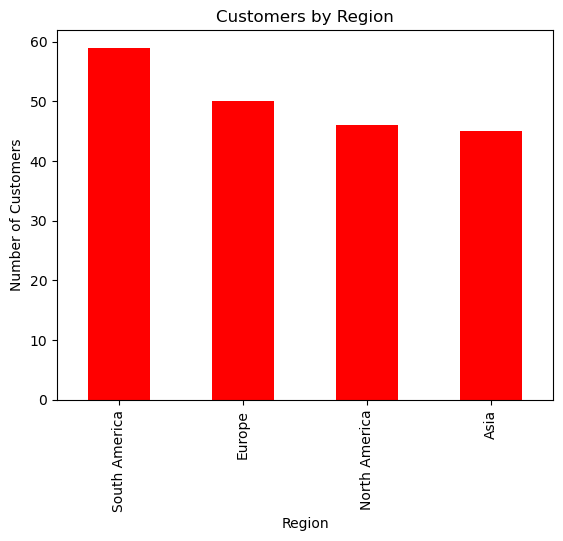

In [9]:
#Count of Customers by region
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', color = 'red')
plt.title('Customers by Region')
plt.ylabel('Number of Customers')
plt.show()

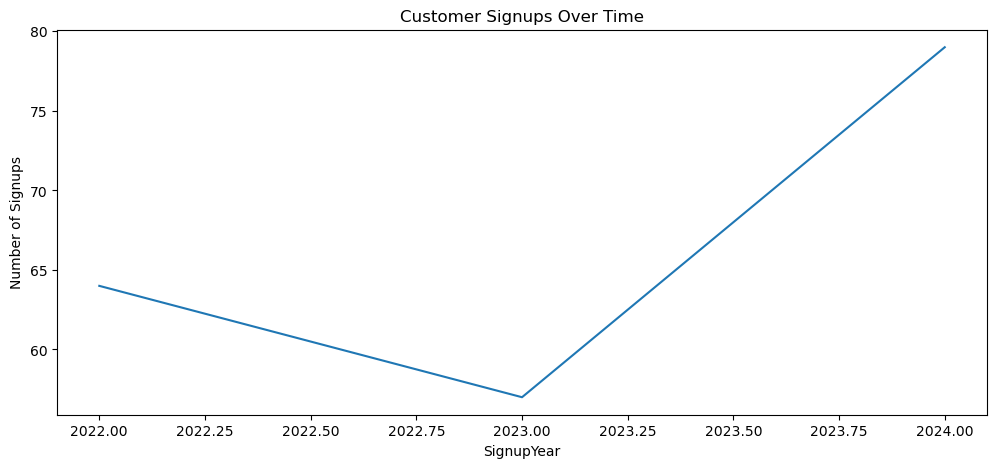

In [10]:
#Distribution of signup dates
plt.figure(figsize=(12,5))
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
signup_trends.plot(kind = 'line')
plt.ylabel('Number of Signups')
plt.title('Customer Signups Over Time')
plt.show()

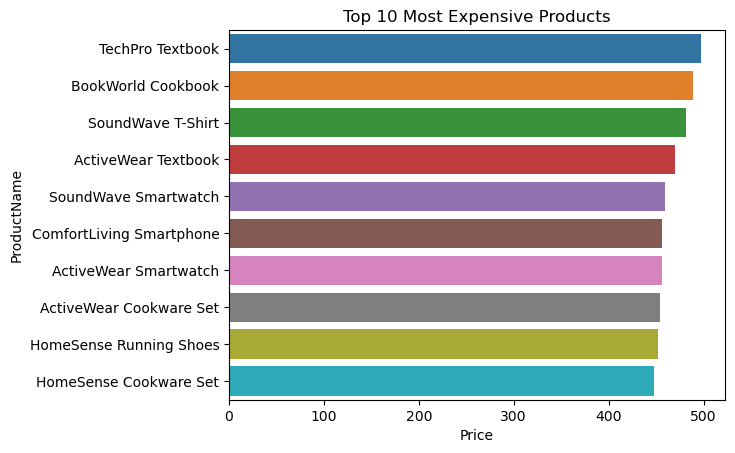

In [11]:
#Top 10 products by price
top_products = products.nlargest(10, 'Price')
sns.barplot(data = top_products, x = 'Price', y = 'ProductName')
plt.title('Top 10 Most Expensive Products')
plt.show()

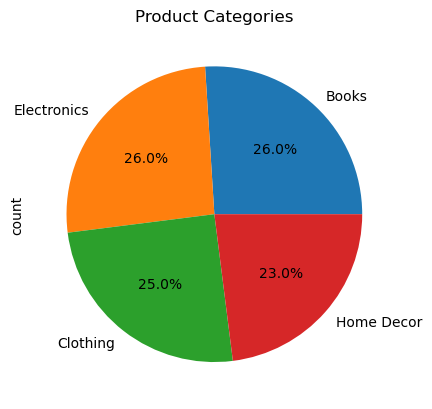

In [12]:
#Product categories distribution
category_distribution = products['Category'].value_counts()
category_distribution.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Product Categories')
plt.show()

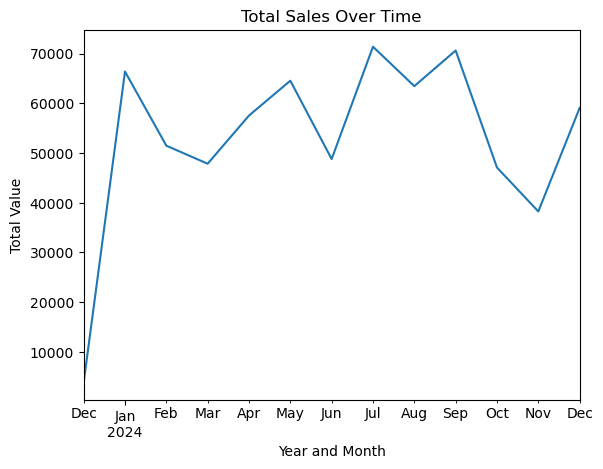

In [13]:
#Total sales by year or month:
transactions['TransactionDate']=pd.to_datetime(transactions['TransactionDate'])
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
sales_trends = transactions.groupby('YearMonth')['TotalValue'].sum()
sales_trends.plot(kind = 'line')
plt.title('Total Sales Over Time')
plt.ylabel('Total Value')
plt.xlabel('Year and Month')
plt.show()

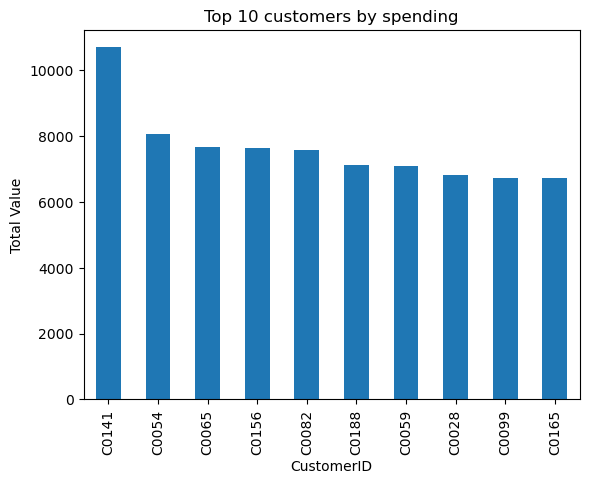

In [14]:
#Top 10 customers by total spending:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
top_customers.plot(kind = 'bar')
plt.title('Top 10 customers by spending')
plt.ylabel('Total Value')
plt.show()

In [15]:
#Merging Datasets
merged_data = pd.merge(transactions, customers, on = 'CustomerID')
merged_data = pd.merge(merged_data, products, on = 'ProductID')

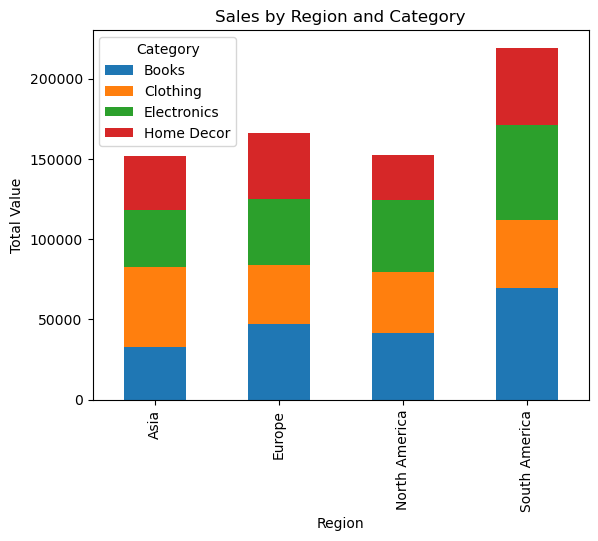

In [16]:
#Sales by region and category
region_category_sales = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()
region_category_sales.plot(kind = 'bar', stacked = True)
plt.title('Sales by Region and Category')
plt.ylabel('Total Value')
plt.show()

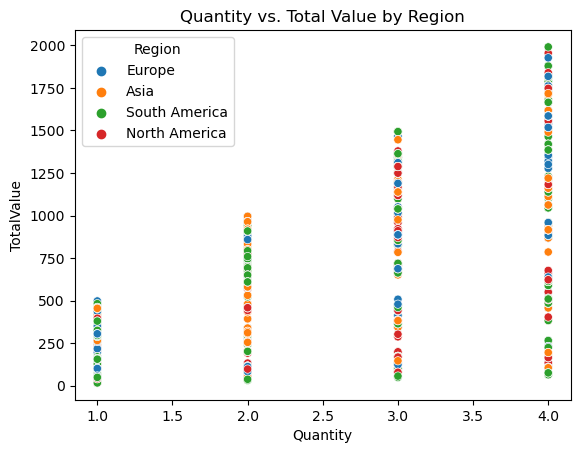

In [17]:
#Analysing purchasing behaviour of customers
sns.scatterplot(data = merged_data, x = 'Quantity', y = 'TotalValue', hue = 'Region')
plt.title('Quantity vs. Total Value by Region')
plt.show()